# Asp7 Example - Advanced Usage

Run this notebook on Google Colab:

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AG-Peter/encodermap/blob/main/tutorials/notebooks_starter/02_Advanced_Usage-Asp7_Example.ipynb)

Find the documentation of EncoderMap:

https://ag-peter.github.io/encodermap

### For Google colab only:

If you're on Google colab, please uncomment these lines and install EncoderMap.

In [1]:
# !wget https://raw.githubusercontent.com/AG-Peter/encodermap/main/tutorials/install_encodermap_google_colab.sh
# !sudo bash install_encodermap_google_colab.sh

If you're on Google colab, you also want to download the Data we will use in this notebook.

In [2]:
# !wget https://raw.githubusercontent.com/AG-Peter/encodermap/main/tutorials/notebooks_starter/asp7.csv
# !wget https://raw.githubusercontent.com/AG-Peter/encodermap/main/tutorials/notebooks_starter/asp7.pdb
# !wget https://raw.githubusercontent.com/AG-Peter/encodermap/main/tutorials/notebooks_starter/asp7.xtc

## Primer

In this tutorial we will use example data from a molecular dynamics simulation and learn more about advanced usage of EncoderMap. Encoder map can create low-dimensional maps of the vast conformational spaces of molecules. This allows easy identification of the most common molecular conformations and helps to understand the relations between these conformations. In this example, we will use data from a simulation of a simple peptide: hepta-aspartic-acid.

First we need to import some libraries:

In [3]:
import encodermap as em
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from math import pi
%config Completer.use_jedi=False
%load_ext autoreload
%autoreload 2

2023-02-06 17:10:40.179679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 17:10:40.309619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:10:40.309639: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-02-06 17:10:40.948256: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:10:40.948332: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:10:40.948340: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Fix the random state of tensorflow for reproducibility.

In [4]:
import tensorflow as tf
tf.random.set_seed(3)

Next, we need to load the input data. Different kinds of variables can be used to describe molecular conformations: e.g. Cartesian coordinates, distances, angles, dihedrals... In principle EncoderMap can deal with any of these inputs, however, some are better suited than others. The molecular conformation does not change when the molecule is translated or rotated. The chosen input variables should reflect that and be translationally and rotationally invariant. 

In this example we use the backbone dihedral angles phi and psi as input as they are translationally and rotationally invariant and describe the backbone of a protein/peptide very well.

The "asp7.csv" file contains one column for each dihedral and one row for each frame of the trajectory. Additionally, the last column contains a cluster_id from a gromos clustering which we can later use for comparison. We can load this data using numpy.loadtxt:

In [5]:
csv_path = "asp7.csv"
data = np.loadtxt(csv_path, skiprows=1, delimiter=",")
dihedrals = data[:, :-1]
cluster_ids = data[:, -1]

In [6]:
import nglview as nv
import mdtraj as md
traj = md.load('asp7.xtc', top='asp7.pdb')
view = nv.show_mdtraj(traj)
view.add_representation('hyperball')
view

NGLWidget(max_frame=10000)

Similarly to the previous example, we need to set some parameters. In contrast to the Cube example we now have periodic input data. The dihedral angles are in radians with a 2pi periodicity. We also set some further parameters but don't bother for now. 

(<AxesSubplot: title={'center': 'high-d'}, xlabel='distance'>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': 'low-d'}, xlabel='distance'>)

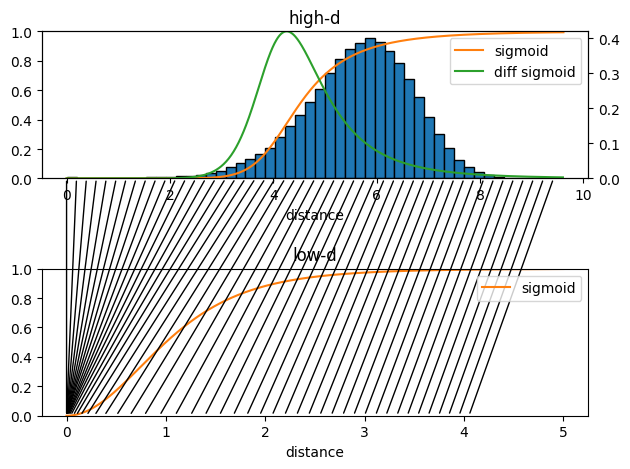

In [7]:
parameters = em.Parameters()
parameters.main_path = em.misc.run_path("runs/asp7")
parameters.n_steps = 100
parameters.dist_sig_parameters = (4.5, 12, 6, 1, 2, 6)
parameters.periodicity = 2*pi
parameters.l2_reg_constant = 10.0
parameters.summary_step = 1
parameters.tensorboard

%matplotlib inline
em.plot.distance_histogram(dihedrals[::10], 
                           parameters.periodicity, 
                           parameters.dist_sig_parameters,
                           bins=50)

Next we can run the dimensionality reduction:

In [8]:
e_map = em.EncoderMap(parameters, dihedrals)

Output files are saved to runs/asp7/run0 as defined in 'main_path' in the parameters.


2023-02-06 17:10:44.723962: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:10:44.724000: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-06 17:10:44.724019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az570-137): /proc/driver/nvidia/version does not exist
2023-02-06 17:10:44.724224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The new tensorflow 2 version of EncoderMap allows you to also view the output of the latent space during the training. Switch that feature on with `e_map.add_images_to_tensorboard()`.

In [9]:
e_map.add_images_to_tensorboard()

Nothing is written to Tensorboard for this Model. Please change parameters.tensorboard to True.


In [10]:
e_map.train()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s, Loss after step ?=?]

  0%|          | 0/100 [00:02<?, ?it/s, Loss after step 1=5.7e+3]

  1%|          | 1/100 [00:02<03:34,  2.17s/it, Loss after step 1=5.7e+3]

  1%|          | 1/100 [00:02<03:34,  2.17s/it, Loss after step 2=5.61e+3]

  2%|▏         | 2/100 [00:02<03:32,  2.17s/it, Loss after step 3=5.54e+3]

  3%|▎         | 3/100 [00:02<03:30,  2.17s/it, Loss after step 4=5.45e+3]

  4%|▍         | 4/100 [00:02<03:28,  2.17s/it, Loss after step 5=5.37e+3]

  5%|▌         | 5/100 [00:02<03:25,  2.17s/it, Loss after step 6=5.31e+3]

  6%|▌         | 6/100 [00:02<03:23,  2.17s/it, Loss after step 7=5.24e+3]

  7%|▋         | 7/100 [00:02<03:21,  2.17s/it, Loss after step 8=5.18e+3]

  8%|▊         | 8/100 [00:02<03:19,  2.17s/it, Loss after step 9=5.11e+3]

  9%|▉         | 9/100 [00:02<00:17,  5.34it/s, Loss after step 9=5.11e+3]

  9%|▉         | 9/100 [00:02<00:17,  5.34it/s, Loss after step 10=5.05e+3]

 10%|█         | 10/100 [00:02<00:16,  5.34it/s, Loss after step 11=5e+3]  

 11%|█         | 11/100 [00:02<00:16,  5.34it/s, Loss after step 12=4.94e+3]

 12%|█▏        | 12/100 [00:02<00:16,  5.34it/s, Loss after step 13=4.89e+3]

 13%|█▎        | 13/100 [00:02<00:16,  5.34it/s, Loss after step 14=4.84e+3]

 14%|█▍        | 14/100 [00:02<00:16,  5.34it/s, Loss after step 15=4.78e+3]

 15%|█▌        | 15/100 [00:02<00:15,  5.34it/s, Loss after step 16=4.73e+3]

 16%|█▌        | 16/100 [00:02<00:15,  5.34it/s, Loss after step 17=4.68e+3]

 17%|█▋        | 17/100 [00:02<00:07, 11.31it/s, Loss after step 17=4.68e+3]

 17%|█▋        | 17/100 [00:02<00:07, 11.31it/s, Loss after step 18=4.62e+3]

 18%|█▊        | 18/100 [00:02<00:07, 11.31it/s, Loss after step 19=4.58e+3]

 19%|█▉        | 19/100 [00:02<00:07, 11.31it/s, Loss after step 20=4.53e+3]

 20%|██        | 20/100 [00:02<00:07, 11.31it/s, Loss after step 21=4.47e+3]

 21%|██        | 21/100 [00:02<00:06, 11.31it/s, Loss after step 22=4.43e+3]

 22%|██▏       | 22/100 [00:02<00:06, 11.31it/s, Loss after step 23=4.38e+3]

 23%|██▎       | 23/100 [00:02<00:06, 11.31it/s, Loss after step 24=4.33e+3]

 24%|██▍       | 24/100 [00:02<00:06, 11.31it/s, Loss after step 25=4.28e+3]

 25%|██▌       | 25/100 [00:02<00:04, 18.20it/s, Loss after step 25=4.28e+3]

 25%|██▌       | 25/100 [00:02<00:04, 18.20it/s, Loss after step 26=4.24e+3]

 26%|██▌       | 26/100 [00:02<00:04, 18.20it/s, Loss after step 27=4.19e+3]

 27%|██▋       | 27/100 [00:02<00:04, 18.20it/s, Loss after step 28=4.15e+3]

 28%|██▊       | 28/100 [00:02<00:03, 18.20it/s, Loss after step 29=4.1e+3] 

 29%|██▉       | 29/100 [00:02<00:03, 18.20it/s, Loss after step 30=4.06e+3]

 30%|███       | 30/100 [00:02<00:03, 18.20it/s, Loss after step 31=4.02e+3]

 31%|███       | 31/100 [00:02<00:03, 18.20it/s, Loss after step 32=3.98e+3]

 32%|███▏      | 32/100 [00:02<00:03, 18.20it/s, Loss after step 33=3.93e+3]

 33%|███▎      | 33/100 [00:02<00:03, 18.20it/s, Loss after step 34=3.89e+3]

 34%|███▍      | 34/100 [00:02<00:02, 27.07it/s, Loss after step 34=3.89e+3]

 34%|███▍      | 34/100 [00:02<00:02, 27.07it/s, Loss after step 35=3.85e+3]

 35%|███▌      | 35/100 [00:02<00:02, 27.07it/s, Loss after step 36=3.81e+3]

 36%|███▌      | 36/100 [00:02<00:02, 27.07it/s, Loss after step 37=3.77e+3]

 37%|███▋      | 37/100 [00:02<00:02, 27.07it/s, Loss after step 38=3.73e+3]

 38%|███▊      | 38/100 [00:02<00:02, 27.07it/s, Loss after step 39=3.69e+3]

 39%|███▉      | 39/100 [00:02<00:02, 27.07it/s, Loss after step 40=3.65e+3]

 40%|████      | 40/100 [00:02<00:02, 27.07it/s, Loss after step 41=3.62e+3]

 41%|████      | 41/100 [00:02<00:02, 27.07it/s, Loss after step 42=3.58e+3]

 42%|████▏     | 42/100 [00:02<00:01, 34.72it/s, Loss after step 42=3.58e+3]

 42%|████▏     | 42/100 [00:02<00:01, 34.72it/s, Loss after step 43=3.55e+3]

 43%|████▎     | 43/100 [00:02<00:01, 34.72it/s, Loss after step 44=3.51e+3]

 44%|████▍     | 44/100 [00:02<00:01, 34.72it/s, Loss after step 45=3.47e+3]

 45%|████▌     | 45/100 [00:02<00:01, 34.72it/s, Loss after step 46=3.44e+3]

 46%|████▌     | 46/100 [00:02<00:01, 34.72it/s, Loss after step 47=3.4e+3] 

 47%|████▋     | 47/100 [00:02<00:01, 34.72it/s, Loss after step 48=3.38e+3]

 48%|████▊     | 48/100 [00:02<00:01, 34.72it/s, Loss after step 49=3.34e+3]

 49%|████▉     | 49/100 [00:02<00:01, 34.72it/s, Loss after step 50=3.31e+3]

 50%|█████     | 50/100 [00:02<00:01, 42.37it/s, Loss after step 50=3.31e+3]

 50%|█████     | 50/100 [00:02<00:01, 42.37it/s, Loss after step 51=3.28e+3]

 51%|█████     | 51/100 [00:02<00:01, 42.37it/s, Loss after step 52=3.25e+3]

 52%|█████▏    | 52/100 [00:02<00:01, 42.37it/s, Loss after step 53=3.22e+3]

 53%|█████▎    | 53/100 [00:02<00:01, 42.37it/s, Loss after step 54=3.19e+3]

 54%|█████▍    | 54/100 [00:02<00:01, 42.37it/s, Loss after step 55=3.15e+3]

 55%|█████▌    | 55/100 [00:02<00:01, 42.37it/s, Loss after step 56=3.13e+3]

 56%|█████▌    | 56/100 [00:02<00:01, 42.37it/s, Loss after step 57=3.1e+3] 

 57%|█████▋    | 57/100 [00:02<00:01, 42.37it/s, Loss after step 58=3.07e+3]

 58%|█████▊    | 58/100 [00:02<00:00, 42.37it/s, Loss after step 59=3.04e+3]

 59%|█████▉    | 59/100 [00:02<00:00, 50.97it/s, Loss after step 59=3.04e+3]

 59%|█████▉    | 59/100 [00:02<00:00, 50.97it/s, Loss after step 60=3.01e+3]

 60%|██████    | 60/100 [00:02<00:00, 50.97it/s, Loss after step 61=2.98e+3]

 61%|██████    | 61/100 [00:02<00:00, 50.97it/s, Loss after step 62=2.96e+3]

 62%|██████▏   | 62/100 [00:02<00:00, 50.97it/s, Loss after step 63=2.93e+3]

 63%|██████▎   | 63/100 [00:02<00:00, 50.97it/s, Loss after step 64=2.91e+3]

 64%|██████▍   | 64/100 [00:03<00:00, 50.97it/s, Loss after step 65=2.88e+3]

 65%|██████▌   | 65/100 [00:03<00:00, 50.97it/s, Loss after step 66=2.85e+3]

 66%|██████▌   | 66/100 [00:03<00:00, 50.97it/s, Loss after step 67=2.83e+3]

 67%|██████▋   | 67/100 [00:03<00:00, 56.19it/s, Loss after step 67=2.83e+3]

 67%|██████▋   | 67/100 [00:03<00:00, 56.19it/s, Loss after step 68=2.81e+3]

 68%|██████▊   | 68/100 [00:03<00:00, 56.19it/s, Loss after step 69=2.78e+3]

 69%|██████▉   | 69/100 [00:03<00:00, 56.19it/s, Loss after step 70=2.76e+3]

 70%|███████   | 70/100 [00:03<00:00, 56.19it/s, Loss after step 71=2.73e+3]

 71%|███████   | 71/100 [00:03<00:00, 56.19it/s, Loss after step 72=2.71e+3]

 72%|███████▏  | 72/100 [00:03<00:00, 56.19it/s, Loss after step 73=2.68e+3]

 73%|███████▎  | 73/100 [00:03<00:00, 56.19it/s, Loss after step 74=2.66e+3]

 74%|███████▍  | 74/100 [00:03<00:00, 56.19it/s, Loss after step 75=2.64e+3]

 75%|███████▌  | 75/100 [00:03<00:00, 59.42it/s, Loss after step 75=2.64e+3]

 75%|███████▌  | 75/100 [00:03<00:00, 59.42it/s, Loss after step 76=2.62e+3]

 76%|███████▌  | 76/100 [00:03<00:00, 59.42it/s, Loss after step 77=2.6e+3] 

 77%|███████▋  | 77/100 [00:03<00:00, 59.42it/s, Loss after step 78=2.57e+3]

 78%|███████▊  | 78/100 [00:03<00:00, 59.42it/s, Loss after step 79=2.56e+3]

 79%|███████▉  | 79/100 [00:03<00:00, 59.42it/s, Loss after step 80=2.53e+3]

 80%|████████  | 80/100 [00:03<00:00, 59.42it/s, Loss after step 81=2.51e+3]

 81%|████████  | 81/100 [00:03<00:00, 59.42it/s, Loss after step 82=2.49e+3]

 82%|████████▏ | 82/100 [00:03<00:00, 59.42it/s, Loss after step 83=2.47e+3]

 83%|████████▎ | 83/100 [00:03<00:00, 63.56it/s, Loss after step 83=2.47e+3]

 83%|████████▎ | 83/100 [00:03<00:00, 63.56it/s, Loss after step 84=2.45e+3]

 84%|████████▍ | 84/100 [00:03<00:00, 63.56it/s, Loss after step 85=2.44e+3]

 85%|████████▌ | 85/100 [00:03<00:00, 63.56it/s, Loss after step 86=2.42e+3]

 86%|████████▌ | 86/100 [00:03<00:00, 63.56it/s, Loss after step 87=2.4e+3] 

 87%|████████▋ | 87/100 [00:03<00:00, 63.56it/s, Loss after step 88=2.38e+3]

 88%|████████▊ | 88/100 [00:03<00:00, 63.56it/s, Loss after step 89=2.36e+3]

 89%|████████▉ | 89/100 [00:03<00:00, 63.56it/s, Loss after step 90=2.34e+3]

 90%|█████████ | 90/100 [00:03<00:00, 63.56it/s, Loss after step 91=2.32e+3]

 91%|█████████ | 91/100 [00:03<00:00, 67.35it/s, Loss after step 91=2.32e+3]

 91%|█████████ | 91/100 [00:03<00:00, 67.35it/s, Loss after step 92=2.31e+3]

 92%|█████████▏| 92/100 [00:03<00:00, 67.35it/s, Loss after step 93=2.29e+3]

 93%|█████████▎| 93/100 [00:03<00:00, 67.35it/s, Loss after step 94=2.27e+3]

 94%|█████████▍| 94/100 [00:03<00:00, 67.35it/s, Loss after step 95=2.26e+3]

 95%|█████████▌| 95/100 [00:03<00:00, 67.35it/s, Loss after step 96=2.24e+3]

 96%|█████████▌| 96/100 [00:03<00:00, 67.35it/s, Loss after step 97=2.22e+3]

 97%|█████████▋| 97/100 [00:03<00:00, 67.35it/s, Loss after step 98=2.2e+3] 

 98%|█████████▊| 98/100 [00:03<00:00, 67.35it/s, Loss after step 99=2.19e+3]

 99%|█████████▉| 99/100 [00:03<00:00, 67.35it/s, Loss after step 100=2.18e+3]

100%|██████████| 100/100 [00:03<00:00, 72.18it/s, Loss after step 100=2.18e+3]

100%|██████████| 100/100 [00:03<00:00, 28.86it/s, Loss after step 100=2.18e+3]

project all dihedrals to the low-dimensional space...

In [11]:
low_d_projection = e_map.encode(dihedrals)

 and plot the result:

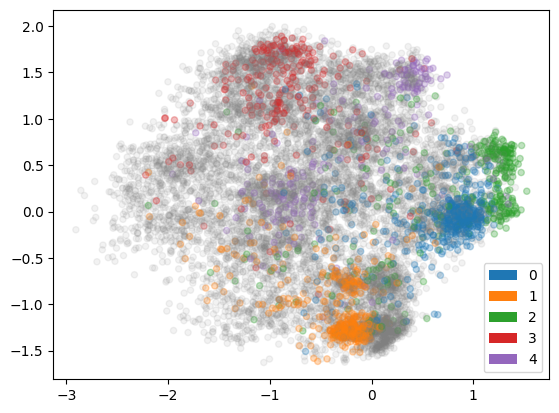

In [12]:
%matplotlib inline

# rgba color from cluster_id. All 1.0s are grey RGBA=(.5, .5, .5, .1)
# the rest are colored with maptlotlib C0, C1, C2, ...
def colors_from_cluster_ids(cluster_ids, max_clusters=10):
    colors = np.full(shape=(len(cluster_ids), 4), fill_value=(.5, .5, .5, .1))
    for i in range(2, max_clusters + 2):
        where = np.where(cluster_ids == i)
        color = (*mpl.colors.to_rgb(f'C{i - 2}'), 0.3)
        colors[where] = color
    return colors

# define max clusters
max_clusters = 5

# create figure
fig, ax = plt.subplots()
scatter = ax.scatter(*low_d_projection.T, s=20, c=colors_from_cluster_ids(cluster_ids, max_clusters))

# fake a legend, because using scatter with RGBA values will not produce a legend
recs = []
for i in range(max_clusters):
    recs.append(mpl.patches.Rectangle((0, 0), 1, 1, fc=f"C{i}"))
ax.legend(recs, range(max_clusters), loc=4)

plt.show()

In the above map points from different clusters (different colors) should be well separated. However, if you didn't change the parameters, they are probably not. Some of our parameter settings appear to be unsuitable. Let's see how we can find out what goes wrong.

## Visualize Learning with TensorBoard

### Running tensorboard on Google colab

To use tensorboard in google colabs notebooks, you neet to first load the tensorboard extension

```python
%load_ext tensorboard
```

And then activate it with:

```python
%tensorboard --logdir .
```

The next code cell contains these commands. Uncomment them and then continue.

### Running tensorboard locally

TensorBoard is a visualization tool from the machine learning library TensorFlow which is used by the EncoderMap package. During the dimensionality reduction step, when the neural network autoencoder is trained, several readings are saved in a TensorBoard format. All output files are saved to the path defined in `parameters.main_path`. Navigate to this location in a shell and start TensorBoard. Change the paramter Tensorboard to `True` to make Encodermap log to Tensorboard.

In case you run this tutorial in the provided Docker container you can open a new console inside the container by typing the following command in a new system shell.
```shell
docker exec -it emap bash
```
Navigate to the location where all the runs are saved. e.g.:
```shell
cd notebooks_easy/runs/asp7/
```
Start TensorBoard in this directory with:
```shell
tensorboard --logdir .
```

You should now be able to open TensorBoard in your webbrowser on port 6006.  
`0.0.0.0:6006` or `127.0.0.1:6006`

In the SCALARS tab of TensorBoard you should see among other values the overall cost and different contributions to the cost. The two most important contributions are `auto_cost` and `distance_cost`. `auto_cost` indicates differences between the inputs and outputs of the autoencoder. `distance_cost` is the part of the cost function which compares pairwise distances in the input space and the low-dimensional (latent) space.

**Fixing Reloading issues**
Using Tensorboard we often encountered some issues while training multiple models and writing mutliple runs to Tensorboard's logdir. Reloading the data and event refreshing the web page did not display the data of the current run. We needed to kill tensorboard and restart it in order to see the new data. This issue was fixed by setting `reload_multifile` `True`.

```bash
tensorboard --logdir . --reload_multifile True
```


In your case, probably the overall cost as well as the auto_cost and the distance_cost are still decreasing after all training iterations. This tells us that we can simply improve the result by increasing the number of training steps. The following cell contains the same code as above. Set a larger number of straining steps to improve the result (e.g. 3000).

**For Goole colab, you can load the Tensorboard extension with:**

In [13]:
# %load_ext tensorboard
# %tensorboard --logdir .

In [14]:
parameters = em.Parameters(
    main_path=em.misc.run_path("runs/asp7"),
    n_steps=100,
    dist_sig_parameters=(4.5, 12, 6, 1, 2, 6),
    periodicity=2*pi,
    l2_reg_constant=10,
    summary_step=1,
    tensorboard=True
)

e_map = em.EncoderMap(parameters, dihedrals)

# Logging images to Tensorboard can greatly reduce performance.
# So they need to be specifically turned on
e_map.add_images_to_tensorboard(dihedrals, 2,
                                scatter_kws={'s': 50, 'c': colors_from_cluster_ids(cluster_ids, 5)}
                               )

e_map.train()

Output files are saved to runs/asp7/run1 as defined in 'main_path' in the parameters.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Saved a text-summary of the model and an image in runs/asp7/run1, as specified in 'main_path' in the parameters.
Logging images with (10001, 12)-shaped data every 2 epochs to Tensorboard at runs/asp7/run1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s, Loss after step ?=?]

  0%|          | 0/100 [00:05<?, ?it/s, Loss after step 1=5.56e+3]

  1%|          | 1/100 [00:05<09:09,  5.55s/it, Loss after step 1=5.56e+3]

  1%|          | 1/100 [00:06<09:09,  5.55s/it, Loss after step 2=5.48e+3]

  2%|▏         | 2/100 [00:06<04:23,  2.69s/it, Loss after step 2=5.48e+3]

  2%|▏         | 2/100 [00:06<04:23,  2.69s/it, Loss after step 3=5.4e+3] 

  3%|▎         | 3/100 [00:06<04:20,  2.69s/it, Loss after step 4=5.33e+3]

  4%|▍         | 4/100 [00:06<01:57,  1.22s/it, Loss after step 4=5.33e+3]

  4%|▍         | 4/100 [00:06<01:57,  1.22s/it, Loss after step 5=5.26e+3]

  5%|▌         | 5/100 [00:07<01:55,  1.22s/it, Loss after step 6=5.2e+3] 

  6%|▌         | 6/100 [00:07<01:16,  1.23it/s, Loss after step 6=5.2e+3]

  6%|▌         | 6/100 [00:07<01:16,  1.23it/s, Loss after step 7=5.14e+3]

  7%|▋         | 7/100 [00:08<01:15,  1.23it/s, Loss after step 8=5.07e+3]

  8%|▊         | 8/100 [00:08<00:57,  1.60it/s, Loss after step 8=5.07e+3]

  8%|▊         | 8/100 [00:08<00:57,  1.60it/s, Loss after step 9=5.02e+3]

  9%|▉         | 9/100 [00:08<00:56,  1.60it/s, Loss after step 10=4.96e+3]

 10%|█         | 10/100 [00:08<00:46,  1.93it/s, Loss after step 10=4.96e+3]

 10%|█         | 10/100 [00:09<00:46,  1.93it/s, Loss after step 11=4.9e+3] 

 11%|█         | 11/100 [00:09<00:46,  1.93it/s, Loss after step 12=4.84e+3]

 12%|█▏        | 12/100 [00:09<00:40,  2.19it/s, Loss after step 12=4.84e+3]

 12%|█▏        | 12/100 [00:09<00:40,  2.19it/s, Loss after step 13=4.79e+3]

 13%|█▎        | 13/100 [00:10<00:39,  2.19it/s, Loss after step 14=4.73e+3]

 14%|█▍        | 14/100 [00:10<00:35,  2.42it/s, Loss after step 14=4.73e+3]

 14%|█▍        | 14/100 [00:10<00:35,  2.42it/s, Loss after step 15=4.68e+3]

 15%|█▌        | 15/100 [00:10<00:35,  2.42it/s, Loss after step 16=4.62e+3]

 16%|█▌        | 16/100 [00:10<00:32,  2.58it/s, Loss after step 16=4.62e+3]

 16%|█▌        | 16/100 [00:11<00:32,  2.58it/s, Loss after step 17=4.57e+3]

 17%|█▋        | 17/100 [00:11<00:32,  2.58it/s, Loss after step 18=4.52e+3]

 18%|█▊        | 18/100 [00:11<00:30,  2.67it/s, Loss after step 18=4.52e+3]

 18%|█▊        | 18/100 [00:11<00:30,  2.67it/s, Loss after step 19=4.47e+3]

 19%|█▉        | 19/100 [00:12<00:30,  2.67it/s, Loss after step 20=4.42e+3]

 20%|██        | 20/100 [00:12<00:29,  2.75it/s, Loss after step 20=4.42e+3]

 20%|██        | 20/100 [00:12<00:29,  2.75it/s, Loss after step 21=4.37e+3]

 21%|██        | 21/100 [00:13<00:28,  2.75it/s, Loss after step 22=4.32e+3]

 22%|██▏       | 22/100 [00:13<00:27,  2.82it/s, Loss after step 22=4.32e+3]

 22%|██▏       | 22/100 [00:13<00:27,  2.82it/s, Loss after step 23=4.27e+3]

 23%|██▎       | 23/100 [00:13<00:27,  2.82it/s, Loss after step 24=4.22e+3]

 24%|██▍       | 24/100 [00:13<00:26,  2.87it/s, Loss after step 24=4.22e+3]

 24%|██▍       | 24/100 [00:13<00:26,  2.87it/s, Loss after step 25=4.18e+3]

 25%|██▌       | 25/100 [00:14<00:26,  2.87it/s, Loss after step 26=4.13e+3]

 26%|██▌       | 26/100 [00:14<00:25,  2.88it/s, Loss after step 26=4.13e+3]

 26%|██▌       | 26/100 [00:14<00:25,  2.88it/s, Loss after step 27=4.08e+3]

 27%|██▋       | 27/100 [00:15<00:25,  2.88it/s, Loss after step 28=4.04e+3]

 28%|██▊       | 28/100 [00:15<00:25,  2.85it/s, Loss after step 28=4.04e+3]

 28%|██▊       | 28/100 [00:15<00:25,  2.85it/s, Loss after step 29=4e+3]   

 29%|██▉       | 29/100 [00:15<00:24,  2.85it/s, Loss after step 30=3.95e+3]

 30%|███       | 30/100 [00:15<00:24,  2.90it/s, Loss after step 30=3.95e+3]

 30%|███       | 30/100 [00:15<00:24,  2.90it/s, Loss after step 31=3.91e+3]

 31%|███       | 31/100 [00:16<00:23,  2.90it/s, Loss after step 32=3.86e+3]

 32%|███▏      | 32/100 [00:16<00:23,  2.91it/s, Loss after step 32=3.86e+3]

 32%|███▏      | 32/100 [00:16<00:23,  2.91it/s, Loss after step 33=3.82e+3]

 33%|███▎      | 33/100 [00:17<00:22,  2.91it/s, Loss after step 34=3.78e+3]

 34%|███▍      | 34/100 [00:17<00:22,  2.96it/s, Loss after step 34=3.78e+3]

 34%|███▍      | 34/100 [00:17<00:22,  2.96it/s, Loss after step 35=3.74e+3]

 35%|███▌      | 35/100 [00:17<00:21,  2.96it/s, Loss after step 36=3.7e+3] 

 36%|███▌      | 36/100 [00:17<00:21,  2.95it/s, Loss after step 36=3.7e+3]

 36%|███▌      | 36/100 [00:17<00:21,  2.95it/s, Loss after step 37=3.66e+3]

 37%|███▋      | 37/100 [00:18<00:21,  2.95it/s, Loss after step 38=3.62e+3]

 38%|███▊      | 38/100 [00:18<00:20,  2.96it/s, Loss after step 38=3.62e+3]

 38%|███▊      | 38/100 [00:18<00:20,  2.96it/s, Loss after step 39=3.58e+3]

 39%|███▉      | 39/100 [00:19<00:20,  2.96it/s, Loss after step 40=3.55e+3]

 40%|████      | 40/100 [00:19<00:20,  2.96it/s, Loss after step 40=3.55e+3]

 40%|████      | 40/100 [00:19<00:20,  2.96it/s, Loss after step 41=3.5e+3] 

 41%|████      | 41/100 [00:19<00:19,  2.96it/s, Loss after step 42=3.47e+3]

 42%|████▏     | 42/100 [00:19<00:19,  2.97it/s, Loss after step 42=3.47e+3]

 42%|████▏     | 42/100 [00:19<00:19,  2.97it/s, Loss after step 43=3.43e+3]

 43%|████▎     | 43/100 [00:20<00:19,  2.97it/s, Loss after step 44=3.4e+3] 

 44%|████▍     | 44/100 [00:20<00:18,  3.00it/s, Loss after step 44=3.4e+3]

 44%|████▍     | 44/100 [00:20<00:18,  3.00it/s, Loss after step 45=3.37e+3]

 45%|████▌     | 45/100 [00:21<00:18,  3.00it/s, Loss after step 46=3.33e+3]

 46%|████▌     | 46/100 [00:21<00:18,  3.00it/s, Loss after step 46=3.33e+3]

 46%|████▌     | 46/100 [00:21<00:18,  3.00it/s, Loss after step 47=3.3e+3] 

 47%|████▋     | 47/100 [00:21<00:17,  3.00it/s, Loss after step 48=3.26e+3]

 48%|████▊     | 48/100 [00:21<00:17,  3.04it/s, Loss after step 48=3.26e+3]

 48%|████▊     | 48/100 [00:21<00:17,  3.04it/s, Loss after step 49=3.23e+3]

 49%|████▉     | 49/100 [00:22<00:16,  3.04it/s, Loss after step 50=3.2e+3] 

 50%|█████     | 50/100 [00:22<00:16,  3.06it/s, Loss after step 50=3.2e+3]

 50%|█████     | 50/100 [00:22<00:16,  3.06it/s, Loss after step 51=3.16e+3]

 51%|█████     | 51/100 [00:23<00:16,  3.06it/s, Loss after step 52=3.13e+3]

 52%|█████▏    | 52/100 [00:23<00:15,  3.05it/s, Loss after step 52=3.13e+3]

 52%|█████▏    | 52/100 [00:23<00:15,  3.05it/s, Loss after step 53=3.1e+3] 

 53%|█████▎    | 53/100 [00:23<00:15,  3.05it/s, Loss after step 54=3.07e+3]

 54%|█████▍    | 54/100 [00:23<00:15,  3.06it/s, Loss after step 54=3.07e+3]

 54%|█████▍    | 54/100 [00:23<00:15,  3.06it/s, Loss after step 55=3.04e+3]

 55%|█████▌    | 55/100 [00:24<00:14,  3.06it/s, Loss after step 56=3.01e+3]

 56%|█████▌    | 56/100 [00:24<00:14,  3.02it/s, Loss after step 56=3.01e+3]

 56%|█████▌    | 56/100 [00:24<00:14,  3.02it/s, Loss after step 57=2.98e+3]

 57%|█████▋    | 57/100 [00:25<00:14,  3.02it/s, Loss after step 58=2.96e+3]

 58%|█████▊    | 58/100 [00:25<00:14,  2.95it/s, Loss after step 58=2.96e+3]

 58%|█████▊    | 58/100 [00:25<00:14,  2.95it/s, Loss after step 59=2.93e+3]

 59%|█████▉    | 59/100 [00:25<00:13,  2.95it/s, Loss after step 60=2.9e+3] 

 60%|██████    | 60/100 [00:25<00:13,  2.91it/s, Loss after step 60=2.9e+3]

 60%|██████    | 60/100 [00:25<00:13,  2.91it/s, Loss after step 61=2.87e+3]

 61%|██████    | 61/100 [00:26<00:13,  2.91it/s, Loss after step 62=2.85e+3]

 62%|██████▏   | 62/100 [00:26<00:13,  2.87it/s, Loss after step 62=2.85e+3]

 62%|██████▏   | 62/100 [00:26<00:13,  2.87it/s, Loss after step 63=2.82e+3]

 63%|██████▎   | 63/100 [00:27<00:12,  2.87it/s, Loss after step 64=2.79e+3]

 64%|██████▍   | 64/100 [00:27<00:12,  2.88it/s, Loss after step 64=2.79e+3]

 64%|██████▍   | 64/100 [00:27<00:12,  2.88it/s, Loss after step 65=2.76e+3]

 65%|██████▌   | 65/100 [00:27<00:12,  2.88it/s, Loss after step 66=2.74e+3]

 66%|██████▌   | 66/100 [00:27<00:11,  2.89it/s, Loss after step 66=2.74e+3]

 66%|██████▌   | 66/100 [00:27<00:11,  2.89it/s, Loss after step 67=2.72e+3]

 67%|██████▋   | 67/100 [00:28<00:11,  2.89it/s, Loss after step 68=2.69e+3]

 68%|██████▊   | 68/100 [00:28<00:11,  2.90it/s, Loss after step 68=2.69e+3]

 68%|██████▊   | 68/100 [00:28<00:11,  2.90it/s, Loss after step 69=2.67e+3]

 69%|██████▉   | 69/100 [00:29<00:10,  2.90it/s, Loss after step 70=2.64e+3]

 70%|███████   | 70/100 [00:29<00:10,  2.90it/s, Loss after step 70=2.64e+3]

 70%|███████   | 70/100 [00:29<00:10,  2.90it/s, Loss after step 71=2.62e+3]

 71%|███████   | 71/100 [00:29<00:09,  2.90it/s, Loss after step 72=2.6e+3] 

 72%|███████▏  | 72/100 [00:29<00:09,  2.92it/s, Loss after step 72=2.6e+3]

 72%|███████▏  | 72/100 [00:29<00:09,  2.92it/s, Loss after step 73=2.58e+3]

 73%|███████▎  | 73/100 [00:30<00:09,  2.92it/s, Loss after step 74=2.55e+3]

 74%|███████▍  | 74/100 [00:30<00:08,  2.93it/s, Loss after step 74=2.55e+3]

 74%|███████▍  | 74/100 [00:30<00:08,  2.93it/s, Loss after step 75=2.53e+3]

 75%|███████▌  | 75/100 [00:31<00:08,  2.93it/s, Loss after step 76=2.51e+3]

 76%|███████▌  | 76/100 [00:31<00:08,  2.94it/s, Loss after step 76=2.51e+3]

 76%|███████▌  | 76/100 [00:31<00:08,  2.94it/s, Loss after step 77=2.48e+3]

 77%|███████▋  | 77/100 [00:32<00:07,  2.94it/s, Loss after step 78=2.47e+3]

 78%|███████▊  | 78/100 [00:32<00:08,  2.64it/s, Loss after step 78=2.47e+3]

 78%|███████▊  | 78/100 [00:32<00:08,  2.64it/s, Loss after step 79=2.44e+3]

 79%|███████▉  | 79/100 [00:32<00:07,  2.64it/s, Loss after step 80=2.42e+3]

 80%|████████  | 80/100 [00:32<00:07,  2.73it/s, Loss after step 80=2.42e+3]

 80%|████████  | 80/100 [00:32<00:07,  2.73it/s, Loss after step 81=2.4e+3] 

 81%|████████  | 81/100 [00:33<00:06,  2.73it/s, Loss after step 82=2.38e+3]

 82%|████████▏ | 82/100 [00:33<00:06,  2.79it/s, Loss after step 82=2.38e+3]

 82%|████████▏ | 82/100 [00:33<00:06,  2.79it/s, Loss after step 83=2.36e+3]

 83%|████████▎ | 83/100 [00:34<00:06,  2.79it/s, Loss after step 84=2.34e+3]

 84%|████████▍ | 84/100 [00:34<00:05,  2.82it/s, Loss after step 84=2.34e+3]

 84%|████████▍ | 84/100 [00:34<00:05,  2.82it/s, Loss after step 85=2.32e+3]

 85%|████████▌ | 85/100 [00:34<00:05,  2.82it/s, Loss after step 86=2310.5] 

 86%|████████▌ | 86/100 [00:34<00:04,  2.84it/s, Loss after step 86=2310.5]

 86%|████████▌ | 86/100 [00:34<00:04,  2.84it/s, Loss after step 87=2.28e+3]

 87%|████████▋ | 87/100 [00:35<00:04,  2.84it/s, Loss after step 88=2.27e+3]

 88%|████████▊ | 88/100 [00:35<00:04,  2.85it/s, Loss after step 88=2.27e+3]

 88%|████████▊ | 88/100 [00:35<00:04,  2.85it/s, Loss after step 89=2.25e+3]

 89%|████████▉ | 89/100 [00:36<00:03,  2.85it/s, Loss after step 90=2.23e+3]

 90%|█████████ | 90/100 [00:36<00:03,  2.87it/s, Loss after step 90=2.23e+3]

 90%|█████████ | 90/100 [00:36<00:03,  2.87it/s, Loss after step 91=2.21e+3]

 91%|█████████ | 91/100 [00:37<00:03,  2.87it/s, Loss after step 92=2.2e+3] 

 92%|█████████▏| 92/100 [00:37<00:02,  2.84it/s, Loss after step 92=2.2e+3]

 92%|█████████▏| 92/100 [00:37<00:02,  2.84it/s, Loss after step 93=2.18e+3]

 93%|█████████▎| 93/100 [00:37<00:02,  2.84it/s, Loss after step 94=2.16e+3]

 94%|█████████▍| 94/100 [00:37<00:02,  2.84it/s, Loss after step 94=2.16e+3]

 94%|█████████▍| 94/100 [00:37<00:02,  2.84it/s, Loss after step 95=2.15e+3]

 95%|█████████▌| 95/100 [00:38<00:01,  2.84it/s, Loss after step 96=2.13e+3]

 96%|█████████▌| 96/100 [00:38<00:01,  2.86it/s, Loss after step 96=2.13e+3]

 96%|█████████▌| 96/100 [00:38<00:01,  2.86it/s, Loss after step 97=2.11e+3]

 97%|█████████▋| 97/100 [00:39<00:01,  2.86it/s, Loss after step 98=2.09e+3]

 98%|█████████▊| 98/100 [00:39<00:00,  2.87it/s, Loss after step 98=2.09e+3]

 98%|█████████▊| 98/100 [00:39<00:00,  2.87it/s, Loss after step 99=2.08e+3]

 99%|█████████▉| 99/100 [00:39<00:00,  2.87it/s, Loss after step 100=2.07e+3]

100%|██████████| 100/100 [00:39<00:00,  2.88it/s, Loss after step 100=2.07e+3]

100%|██████████| 100/100 [00:39<00:00,  2.51it/s, Loss after step 100=2.07e+3]

The molecule conformations form different clusters (different colors) should be separated a bit better now. In TensorBoard you should see the cost curves for this new run. When the cost curve becomes more or less flat towards the end, longer training does not make sense.

The resulting low-dimensional projection is probably still not very detailed and clusters are probably not well separated. Currently we use a regularization constant `parameters.l2_reg_constant = 10.0`. The regularization constant influences the 
complexity of the network and the map. A high regularization constant will result in a smooth map with little details. A small regularization constant will result in a rougher more detailed map.

Go back to the previous cell and decrease the regularization constant (e.g. `parameters.l2_reg_constant = 0.001`). Play with different settings to improve the separation of the clusters in the map. Have a look at TensorBoard to see how the cost changes for different parameters.

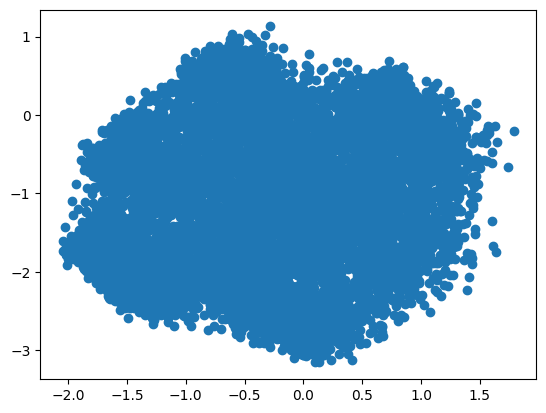

In [15]:
%matplotlib inline
plt.close('all')
plt.scatter(*e_map.encode(dihedrals).T)

**Here is what you can see in Tensorboard:**

<img src="Tensorboard_Cost.png" width="800">

<img src="Tensorboard_Histograms.png" width="800">

<img src="Tensorboard_Parameters.png" width="800">

<img src="Tensorboard_Images.png" width="800">

### Save and Load
Once you are satisfied with your EncoderMap, you might want to save the result. The good news is: Encoder map automatically saves checkpoints during the training process in `parameters.main_path`. The frequency of writing checkpoints can be defined with `patameters.checkpoint_step`. Also, your selected parameters are saved in a file called `parameters.json`. Navigate to the driectory of your last run and open this `parameters.json` file in some text editor. You should find all the parameters that we have set so far. You also find some parameters which were not set by us specifically and where EncoderMap used its default values.

Let's start by looking at the parameters from the last run and printing them in a nicely formatted table with the `.parameters` attribute.

In [16]:
loaded_parameters = em.Parameters.from_file('runs/asp7/run0/parameters.json')
print(loaded_parameters.parameters)

    Parameter            | Value                    | Description                                         
    ---------------------+--------------------------+---------------------------------------------------  
    n_neurons            | [128, 128, 2]            | List containing number of neurons for each layer    
                         |                          | up to the bottleneck layer. For example [128, 128,  
                         |                          | 2] stands for an autoencoder with the following     
                         |                          | architecture {i, 128, 128, 2, 128, 128, i} where i  
                         |                          | is the number of dimensions of the input data.      
                         |                          | These are Input/Output Layers that are not          
                         |                          | trained.                                            
    ---------------------+-----------

Before we can reload our trained network we need to save it manually, because the checkpoint step was set to 5000 and we did only write a checkpoint at 0 (random initial weights). We call `e_map.save()` to do so.

In [17]:
e_map.save()

Saved current state of model.
Use em.EncoderMap.from_checkpoint('runs/asp7/run1/saved_model_2023-02-06T17:11:31+00:00.model*') to reload the current state of the two submodels.


And now we reload it.

In [18]:
# get the most recent file
import os
from pathlib import Path
latest_checkpoint_file = str(list(sorted(Path("runs/asp7").rglob("*model*"), key=os.path.getmtime, reverse=True))[0]).rstrip("_decoder").rstrip("_encoder")
print(latest_checkpoint_file)
loaded_e_map = em.EncoderMap.from_checkpoint(latest_checkpoint_file, overwrite_tensorboard_bool=True)

runs/asp7/run1/saved_model_2023-02-06T17:11:31+00:00.model


rebuilding Model with input_dim = 12 and periodicity = 6.283185307179586


Now we are finished with loading and we can for example use the loaded EncoderMap object to project data to the low_dimensional space and plot the result:

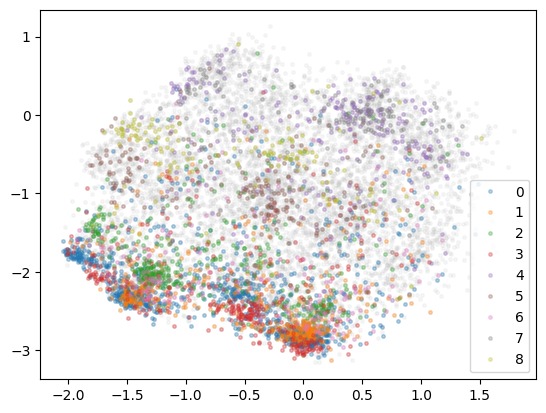

In [19]:
low_d_projection = e_map.encode(dihedrals)

# Plotting:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(low_d_projection[:, 0], low_d_projection[:, 1], linestyle="", marker=".",
         markersize=5, color="0.7", alpha=0.1)
for i in range(9):
    mask = cluster_ids == i + 1
    ax.plot(low_d_projection[:, 0][mask], low_d_projection[:, 1][mask], label=str(i),
             linestyle="", marker=".", markersize=5, alpha=0.3)

legend = ax.legend()
for lh in legend.legendHandles:
    if hasattr(lh, "legmarker"):
        lh.legmarker.set_alpha(1)

### Generate Molecular Conformations
Already in the cube example, you have seen that with EncoderMap it is not only possible to project points to the low-dimensional space. Also, a projection of low-dimensional points into the high-dimensional space is possible. 

Here, we will use a tool form the EncoderMap library to interactively select a path in the low-dimensional map. We will project points along this path into the high-dimensional dihedral space, and use these dihedrals to reconstruct molecular conformations. This can be very useful to explore the landscape an to see what changes in the molecular conformation going from one cluster to another.

The next cell instantiates a class with which you can interact with the low-dimensional projection of the Autoencoder. You can select clusters with the `Polygon`, `Ellipse,`, `Rectangle` and `Lasso` tools. The clusters will be selected fron the input conformations in `asp7.xtc`.

More interesting is the `Bezier` and `Path` tool. With these you can generate molecular conformations from a path in the latent space.

Click `Set Points` and then `Write`/`Generate` to make your own clusters/paths. You can have a look at what you selected using the `sess.view` attribute of the InteractivePlotting class. For this you need to have nglview installed.

Give the InteractivePlotting a try. We would like to hear your feedback at GitHub.

**Note:** This notebook uses a non-interactive matploltib backend to render for web pages. Switch to an interactive backend by using either:

```python
%matploltib qt5
```

or 

```python
%matploltib notebook
```

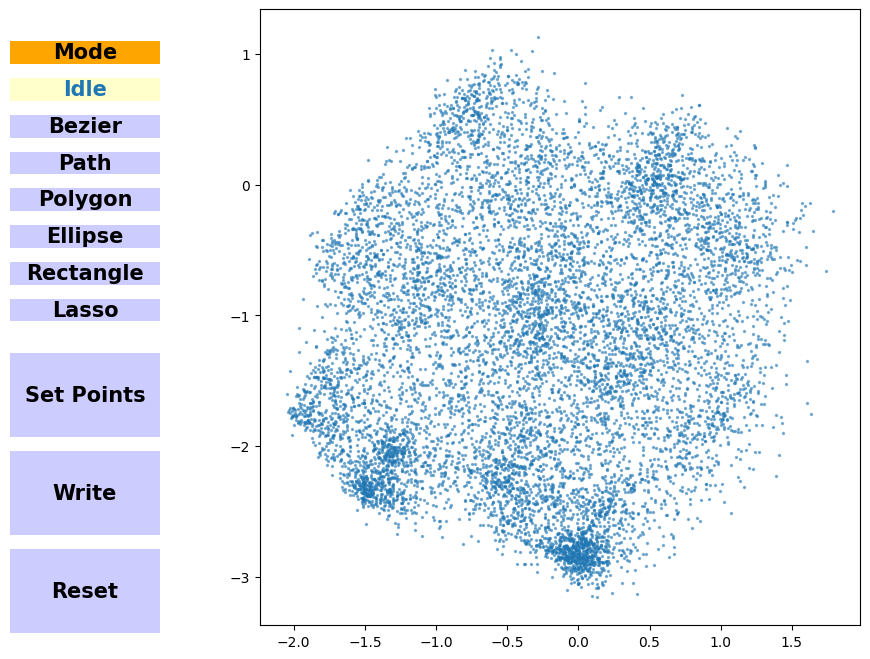

In [20]:
#%matploltib notebook
sess = em.InteractivePlotting(e_map, "asp7.xtc", data=low_d_projection,
                              top='asp7.pdb', scatter_kws={'s': 2})

In [21]:
sess.view

AttributeError: 'InteractivePlotting' object has no attribute 'view'

As backbone dihedrals contain no information about the side-chains, only the backbone of the molecule can be reconstructed. 
In case the generated conformations change very abruptly it might be sensible to increase the regularization constant to obtain a smoother representation. If the generated conformations along a path are not changing at all, the regularization is probably to strong and prevents the network form generating different conformations.

## Conclusion

In this tutorial we applied EncoderMap to a molecular system. You have learned how to monitor the EncoderMap training procedure with TensorBoard, how to restore previously saved EncoderMaps and how to generate Molecular conformations using the path selection tool.